A = 0.49965409666666666(m)
dcp = 0.12491352416666666(m)
k = 12.57507013171009(m)
O1min = 70.52877936550931°
Значення нульових кутів = [70.0]
Ширина головної пелюстки в площині FH = 91.67°
Ширина головної пелюстки в площині FE = 67.61°


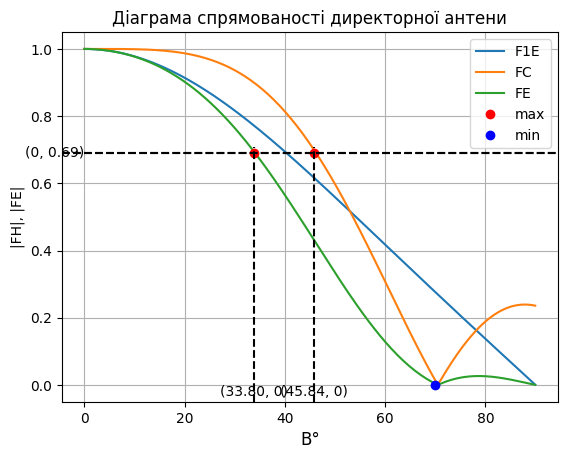

In [1]:
import numpy
import matplotlib.pyplot as plt
import math


F1E = [1]
FC = [1]
FE = [1]
steps = [0]
SGP1 = 0
SGP2 = 0
Zeros = []

N = 6
F = 600 * 10 **6
lambd = 299792458 / F
print("A = " + str(lambd) + "(m)")
d = 0.25 * lambd
print("dcp = "+ str(d) + "(m)")
k = (2 * numpy.pi)/lambd
print("k = " + str(k) + "(m)")

for i in range(1, 10):
    p = numpy.arccos(1 - (i * lambd) / (N * d))
    if math.degrees(p) <= 90:
        print('O' + str(i) + "min = " + str(math.degrees(p)) + '\u00b0' )
    if math.degrees(p) > 90:
        break

for teta in numpy.arange(0.01, numpy.pi /2, 0.01):
    nn1 = abs((numpy.cos(numpy.pi/2 * numpy.sin(teta))/numpy.cos(teta)))
    nn2 = abs((numpy.sin((N * k * d *(1 - numpy.cos(teta))/ 2)) /(N * numpy.sin((k * d * (1 - numpy.cos(teta)))/ 2))))
    nn3 = nn1 * nn2
    F1E += [nn1]
    FC += [nn2]
    FE += [nn3]
    if 0.69 < nn2 < 0.71:
        SGP1 = 2 * math.degrees(teta)
    if nn2 < 0.01:
        if round(math.degrees(teta), 0) not in Zeros:
            Zeros += [round(math.degrees(teta), 0)]
    if 0.69 < nn3 < 0.71:
        SGP2 = 2 * math.degrees(teta)
    steps += [math.degrees(teta)]

print("Значення нульових кутів = " + str(Zeros))
print("Ширина головної пелюстки в площині FH = " + str(round(SGP1, 2)) + '\u00b0')
print("Ширина головної пелюстки в площині FE = " + str(round(SGP2, 2)) + '\u00b0')

plt.plot(steps, F1E, label='F1E')
plt.plot(steps, FC, label='FC')
plt.plot(steps, FE, label='FE')
plt.plot(SGP1 / 2,0.69, 'ro', label='max')
plt.plot(SGP2 / 2,0.69, 'ro')
plt.plot(Zeros, [0] * len(Zeros), 'bo', label='min')

plt.axhline(y=0.69, xmin=0, xmax=SGP1 / 2, color='k', linestyle='--')
plt.axhline(y=0.69, xmin=0, xmax=SGP2 / 2, color='k', linestyle='--')
plt.axvline(x=SGP1 / 2, ymin=0, ymax=0.69, color='k', linestyle='--')
plt.axvline(x=SGP2 / 2, ymin=0, ymax=0.69, color='k', linestyle='--')

plt.text(SGP1 / 2, 0, f'({SGP1 / 2:.2f}, 0)', ha='center', va='top')
plt.text(SGP2 / 2, 0, f'({SGP2 / 2:.2f}, 0)', ha='center', va='top')
plt.text(0, 0.69, f'(0, {0.69:.2f})', ha='right', va='center')


plt.title('Діаграма спрямованості директорної антени')
plt.ylabel('|FH|, |FE|')
plt.xlabel('B' + '\u00b0', fontsize=12)
plt.legend()

plt.grid()
plt.show()